In [30]:
#Import dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
API_KEY = "****************************"



In [ ]:
#Install full-fred module
%pip install full-fred

### Create function to reformat Fred data

In [88]:
# Create function to Relabel & Organize Datasets from full_fred Module
def reformat_fred_df(dataframe, value_col_rename=str):
    """Returns reformated Dataframe with Date and Renamed Value Column.
    Converts Date to datetime64 & Value to float. 
    (Does not accept strings in Value Columns*! 
    Replace str values to Nan in 'value' columns.)

    **Parameters**

    :dataframe --> Takes raw dataframe from .get_series_df method 
    :value_col_rename --> Renames 'value' column to proper Value name 
    e.g. pd.rename(columns={'value': value_col_rename})
    """

    #Rename columns
    dataframe = dataframe.rename(
        columns={
            "date": "Date",
            "value": value_col_rename,
        }
    )

    #Grab Columns needed for Dataframe
    dataframe = dataframe[["Date", value_col_rename]]

    #Change 'Date' column to datetime64 type
    dataframe["Date"] = pd.to_datetime(dataframe["Date"])

    #Change 'Value' column to float
    try:
        dataframe[value_col_rename] = dataframe[value_col_rename].astype(float)
    except ValueError:
        print("Value Error! Please convert string value to Nan in value column.")

    #Add 'Year' Column
    dataframe["Year"] = dataframe["Date"].dt.year

    #Format Dataframe
    dataframe = dataframe[["Year", "Date", value_col_rename]]

    #Return dataframe
    return dataframe

### Create function to create Dataframe based on average value for each year from formatted Fred dataframe


In [128]:
def average_values_by_year_df(dataframe):
    """Returns new Dataframe with average values based on the year of dataframe passed.
    
    **Parameters**

    :dataframe --> Takes dataframe that has following cols: Year|Date|{Value}| 
    :Only takes Fred Data that has already been formatted. Otherwise Error will occur.
    """

    # Get dataframe value column
    value_col = list(dataframe)[2]

    # Group all the values by year
    avg_by_year = dataframe.groupby('Year')[value_col].mean()

    # Reset the index, so that year is a column instead of index
    avg_by_year = avg_by_year.reset_index()

    # Round value column by two
    avg_by_year[value_col] = round(avg_by_year[value_col], 2)
 
    # Create new dataframe
    new_df = pd.DataFrame(avg_by_year)

    # Rename value column to label it as Average + value
    new_df = new_df.rename(columns={value_col: f"Avg. {value_col}"})

    # Return dataframe
    return new_df

# Searching for Series using Full Fred library
##### Full Fred Documentation <https://github.com/7astro7/full_fred>


In [33]:
from full_fred.fred import Fred
fred = Fred('api_key.txt')

# Check api key
fred.get_api_key_file()

'api_key.txt'

In [34]:
# Search through Fred database for series 
# #Storing in variable to avoid running output
home_sales_search = fred.search_for_series(search_words=["home sales"])


# 1)Open in text editor to go through data 
# 2)Command + f to search through text editor
# 3)Grab the 'id' value for the dataset you want
# 4)For example - if we want the id from the first dataset
# id = 'MSPUS' 

## Median Home Sale Price Data (1963 - Present)

In [35]:
# Use the .get_series_df method and enter the 'id' from the desired dataset
median_home_price = fred.get_series_df('MSPUS')
median_home_price

,realtime_start,realtime_end,date,value
0,2023-11-10,2023-11-10,1963-01-01,17800
1,2023-11-10,2023-11-10,1963-04-01,18000
2,2023-11-10,2023-11-10,1963-07-01,17900
3,2023-11-10,2023-11-10,1963-10-01,18500
4,2023-11-10,2023-11-10,1964-01-01,18500
...,...,...,...,...
238,2023-11-10,2023-11-10,2022-07-01,468000.0
239,2023-11-10,2023-11-10,2022-10-01,479500.0
240,2023-11-10,2023-11-10,2023-01-01,429000.0
241,2023-11-10,2023-11-10,2023-04-01,418500.0


In [99]:
# Reformat Dataframe
median_home_price_df = reformat_fred_df(median_home_price, "Median Home Sale Price")

# Display Dataframe
median_home_price_df

,Year,Date,Median Home Sale Price
0,1963,1963-01-01,17800.0
1,1963,1963-04-01,18000.0
2,1963,1963-07-01,17900.0
3,1963,1963-10-01,18500.0
4,1964,1964-01-01,18500.0
...,...,...,...
238,2022,2022-07-01,468000.0
239,2022,2022-10-01,479500.0
240,2023,2023-01-01,429000.0
241,2023,2023-04-01,418500.0


##### Annual Average Median Home Sale Price Data

In [104]:
# Create new Dataframe that shows the avergae value by year
avg_med_home_price_by_year_df = average_values_by_year_df(median_home_price_df)

# Display dataframe
avg_med_home_price_by_year_df

,Year,Avg. Median Home Sale Price
0,1963,18050.00
1,1964,18925.00
2,1965,20125.00
3,1966,21500.00
4,1967,22750.00
...,...,...
56,2019,320250.00
57,2020,336950.00
58,2021,396800.00
59,2022,457475.00


## 30 Year Mortgage Rate Data (1971 - Present)

In [37]:
interest_rate_search = fred.search_for_series(search_words=["interest rate"])


In [38]:
mortgage_30 = fred.get_series_df("MORTGAGE30US")

## Data sourced from '30-Year Fixed Rate Mortgage Average in the United States'

In [60]:
# Reformat Dataframe
mortgage_30_df = reformat_fred_df(mortgage_30, "30 Year Fixed Mortgage Rate")

,Year,Date,30 Year Fixed Mortgage Rate
0,1971,1971-04-02,7.33
1,1971,1971-04-09,7.31
2,1971,1971-04-16,7.31
3,1971,1971-04-23,7.31
4,1971,1971-04-30,7.29
...,...,...,...
2741,2023,2023-10-12,7.57
2742,2023,2023-10-19,7.63
2743,2023,2023-10-26,7.79
2744,2023,2023-11-02,7.76


##### Annual Average 30 Year Fixed Mortgage Rate Data

In [108]:
# Use average_value_by_year() to create new Dataframe
avg_mortgage_30_df = average_values_by_year_df(mortgage_30_df)

# Display Dataframe
avg_mortgage_30_df.head()

,Year,Avg. 30 Year Fixed Mortgage Rate
0,1971,7.54
1,1972,7.38
2,1973,8.04
3,1974,9.19
4,1975,9.05


## 15 Year Mortgage Rate Data (1991 - Present)

In [41]:
mortgage_15 = fred.get_series_df("MORTGAGE15US")

## Data sourced from '15-Year Fixed Rate Mortgage Average in the United States'

In [61]:
# Reformat Dataframe
mortgage_15_df = reformat_fred_df(mortgage_15, "15 Year Fixed Mortgage Rate")

# Display Dataframe
mortgage_15_df.head()

,Year,Date,15 Year Fixed Mortgage Rate
0,1991,1991-08-30,8.77
1,1991,1991-09-06,8.79
2,1991,1991-09-13,8.68
3,1991,1991-09-20,8.62
4,1991,1991-09-27,8.59


##### Annual Average 15 Year Fixed Mortgage Rate Data

In [109]:
# Use average_value_by_year() to create new Dataframe
avg_mortgage_15_df = average_values_by_year_df(mortgage_15_df)

# Display Dataframe
avg_mortgage_15_df.head()

,Year,Avg. 15 Year Fixed Mortgage Rate
0,1991,8.40
1,1992,7.94
2,1993,6.82
3,1994,7.89
4,1995,7.48


## Home Price Index Data (1987 - Present)

In [44]:
home_price_search = fred.search_for_series(search_words=["home price"])

In [62]:
home_price_index = fred.get_series_df("CSUSHPINSA")
home_price_index

## Data sourced from S&P/Case-Shiller U.S. National Home Price Index

,realtime_start,realtime_end,date,value
0,2023-11-10,2023-11-10,1975-01-01,.
1,2023-11-10,2023-11-10,1975-02-01,.
2,2023-11-10,2023-11-10,1975-03-01,.
3,2023-11-10,2023-11-10,1975-04-01,.
4,2023-11-10,2023-11-10,1975-05-01,.
...,...,...,...,...
579,2023-11-10,2023-11-10,2023-04-01,301.469
580,2023-11-10,2023-11-10,2023-05-01,305.427
581,2023-11-10,2023-11-10,2023-06-01,308.307
582,2023-11-10,2023-11-10,2023-07-01,310.16200000000003


In [63]:
# Change string values in value column to Nan values
home_price_index["value"] = home_price_index['value'].replace(".", np.nan)

In [64]:
# Reformat Dataframe
home_price_index_df = reformat_fred_df(home_price_index, "Home Price Index")

# Display Dataframe
home_price_index_df

,Year,Date,Home Price Index
0,1975,1975-01-01,NaN
1,1975,1975-02-01,NaN
2,1975,1975-03-01,NaN
3,1975,1975-04-01,NaN
4,1975,1975-05-01,NaN
...,...,...,...
579,2023,2023-04-01,301.469
580,2023,2023-05-01,305.427
581,2023,2023-06-01,308.307
582,2023,2023-07-01,310.162


##### Annual Average Home Price Index Data

In [111]:
# Use average_value_by_year() to create new Dataframe
avg_home_price_index_df = average_values_by_year_df(home_price_index_df)

# Display Dataframe (displaying tail because head values are Nan---> Should we drop Nan values?)
avg_home_price_index_df.tail()

,Year,Avg. Home Price Index
44,2019,209.45
45,2020,222.12
46,2021,260.06
47,2022,298.52
48,2023,302.56


## Household Debt to GDP Data (2005 - Present)

In [49]:
gdp_search = fred.search_for_series(search_words=["GDP"])

In [65]:
household_debt_to_gdp = fred.get_series_df("HDTGPDUSQ163N")

## Data sourced from  "Household Debt to GDP for United States", International Monetary Fund

In [66]:
# Reformat Dataframe
household_debt_to_gdp_df = reformat_fred_df(household_debt_to_gdp, "Household Debt to GDP")

# Display Dataframe
household_debt_to_gdp_df.head()

,Year,Date,Household Debt to GDP
0,2005,2005-01-01,86.795348
1,2005,2005-04-01,89.366533
2,2005,2005-07-01,92.138275
3,2005,2005-10-01,94.436722
4,2006,2006-01-01,91.736689


##### Annual Average Household Debt to GDP Data

In [113]:
# Use average_value_by_year() to create new Dataframe
avg_household_debt_to_gdp_df = average_values_by_year_df(household_debt_to_gdp_df)

# Display Dataframe
avg_household_debt_to_gdp_df.head()

,Year,Avg. Household Debt to GDP
0,2005,90.68
1,2006,95.35
2,2007,98.15
3,2008,99.06
4,2009,99.27


# Test Merging Dataframes and Visualization

In [74]:
# Merging Median Home Prices and Household Debt to GDP
# Only merging as a test since these two have overlapping 'Date' values

med_home_price_and_gdp = pd.merge(median_home_price_df, household_debt_to_gdp_df, how="inner", on="Date")

In [75]:
#Display dataframe
med_home_price_and_gdp = med_home_price_and_gdp[["Date", "Median Home Sale Price", "Household Debt to GDP"]]
med_home_price_and_gdp

,Date,Median Home Sale Price,Household Debt to GDP
0,2005-01-01,232500.0,86.795348
1,2005-04-01,233700.0,89.366533
2,2005-07-01,236400.0,92.138275
3,2005-10-01,243600.0,94.436722
4,2006-01-01,247700.0,91.736689
...,...,...,...
69,2022-04-01,449300.0,76.140050
70,2022-07-01,468000.0,77.407977
71,2022-10-01,479500.0,78.279285
72,2023-01-01,429000.0,74.355033


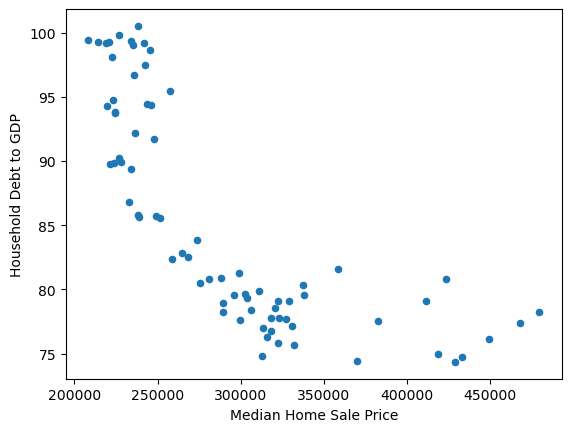

In [76]:
# Create Scatter Plot
med_home_price_and_gdp.plot(kind="scatter", x="Median Home Sale Price", y= "Household Debt to GDP")

# Show Plot
plt.show()

# Testing Merge on all Annual Average Data

In [129]:
# Gather all Annaully Average Values Dataframes in list
data_frames = [
    avg_med_home_price_by_year_df, 
    avg_mortgage_30_df, 
    avg_mortgage_15_df,
    avg_home_price_index_df,
    avg_household_debt_to_gdp_df]

In [130]:
# Merge each Dataframe
merge1_df = pd.merge(data_frames[0], data_frames[1], how='outer', on="Year")
merge2_df = pd.merge(merge1_df, data_frames[2], how="outer", on="Year")
merge3_df = pd.merge(merge2_df, data_frames[3], how="outer", on="Year")
merge4_df = pd.merge(merge3_df, data_frames[4], how="outer", on="Year")

In [131]:
# Store final merge_df in variable
complete_df = merge4_df

#Display dataframe
complete_df

,Year,Avg. Median Home Sale Price,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Home Price Index,Avg. Household Debt to GDP
0,1963,18050.00,NaN,NaN,NaN,NaN
1,1964,18925.00,NaN,NaN,NaN,NaN
2,1965,20125.00,NaN,NaN,NaN,NaN
3,1966,21500.00,NaN,NaN,NaN,NaN
4,1967,22750.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
56,2019,320250.00,3.94,3.39,209.45,76.27
57,2020,336950.00,3.11,2.60,222.12,80.03
58,2021,396800.00,2.96,2.27,260.06,77.97
59,2022,457475.00,5.34,4.58,298.52,76.64


# Test Plotting all merged data

In [135]:
# Fill Nans with 0
df_filled = complete_df.fillna(0)


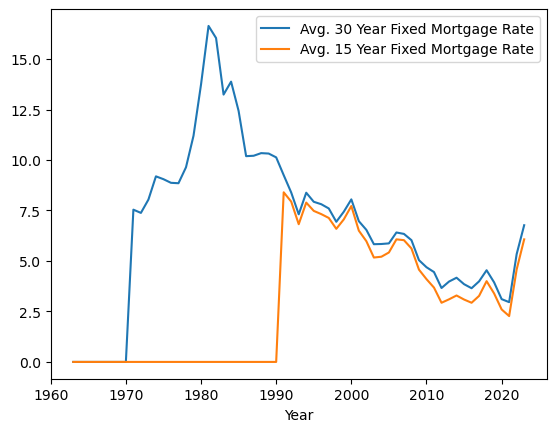

In [136]:
df_filled.plot(kind="line", x='Year', y=["Avg. 30 Year Fixed Mortgage Rate", "Avg. 15 Year Fixed Mortgage Rate"])

plt.show()